In [10]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [11]:
dataset_path = '../../data/processed/cdts_prediction.csv'
dataset = pd.read_csv(dataset_path)
dataset = dataset.drop(columns=['codigo_cliente'])

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3778 entries, 0 to 3777
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      3778 non-null   float64
 1   trabajo                   3778 non-null   object 
 2   estado_civil              3778 non-null   object 
 3   credito_en_mora           3778 non-null   object 
 4   credito_hipoteca          3778 non-null   object 
 5   credito_personal          3778 non-null   object 
 6   contacto                  3778 non-null   object 
 7   mes                       3778 non-null   object 
 8   dia_semana                3778 non-null   object 
 9   educacion                 3778 non-null   object 
 10  campania                  3778 non-null   float64
 11  dias_transcurridos        3778 non-null   float64
 12  contactos_previos         3778 non-null   float64
 13  resultado_previas         3778 non-null   object 
 14  tasa_emp

In [13]:
y = dataset['resultado']
dataset = dataset.drop(columns=['resultado'], axis=1)
dataset_ohe = pd.get_dummies(dataset, drop_first=True)
dataset_ohe.shape

(3778, 54)

In [14]:
X = dataset_ohe

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

scaler = StandardScaler()

numerical_columns = dataset_ohe.select_dtypes(include='number').columns.tolist()

X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns]= scaler.transform(X_test[numerical_columns])


La precisión (accuracy) del modelo Random Forest es: 0.78


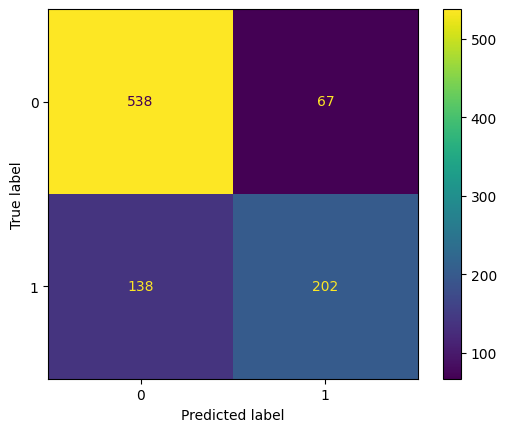

In [15]:
# Crear una instancia del clasificador de Árbol de Decisión
# random_state asegura que el resultado sea reproducible
svm = SVC()

# Entrenar el modelo con los datos de entrenamiento
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nLa precisión (accuracy) del modelo Random Forest es: {accuracy:.2f}")

cm= confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(random_state=42)) 
])

param_grid = {
    'svc__C': [0.1, 1, 10, 100],            # Probar valores para el parámetro de regularización C
    'svc__gamma': ['scale', 'auto', 0.1, 1], # Probar valores para gamma
    'svc__kernel': ['rbf', 'linear']          # Probar los dos kernels más comunes
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    verbose=2
)

grid_search.fit(X_train,y_train)

best_model_svm = grid_search.best_estimator_

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [ ]:
y_pred = best_model_svm.predict(X_test)